$c(x,0) = \sum_{n=1}^N C_n sin(n\pi x) = \phi(x) = 1$ when $0<x<1$

In [24]:
import sympy as sp
sp.init_session(quiet=True)
sp.init_printing()

var('X,T',cls=Function)
var('alpha gamma c', positive=True)
var('C1 C2')

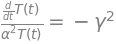

In [25]:
timeODE = sp.Eq(T(t).diff(t,1)/(alpha**2*T(t)),-gamma**2)
timeODE

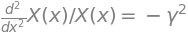

In [26]:
spaceODE = sp.Eq(X(x).diff(x,2)/X(x),-gamma**2)
spaceODE

In [27]:
sp.dsolve(timeODE,T(t))

In [28]:
list_of_hints = sp.classify_ode(timeODE)
list_of_solutions = [sp.dsolve(timeODE,T(t), hint=hint) for hint in list_of_hints]
list_of_solutions

timePiece = sp.dsolve(timeODE,T(t), hint='1st_linear')
timePiece

spacePiece = sp.dsolve(spaceODE,X(x))
spacePiece

In [29]:
generalSolution = (timePiece.rhs).subs(C1,1)*spacePiece.rhs
generalSolution

In [30]:
genSub = generalSolution.subs({t:0, C2:0, gamma:n*sp.pi})
genSub

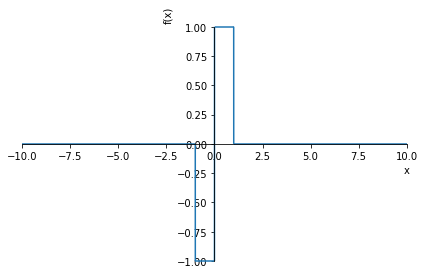

In [45]:
%matplotlib inline
p = sp.Piecewise((0,x<-1),(-1, x<0),(1,x<1),(0,True))
q = sp.Piecewise((0,x<0),(1,x<1),(0,True))
Fourier = sp.fourier_series(p,(-1,1)).truncate(20)
sp.plot(p)

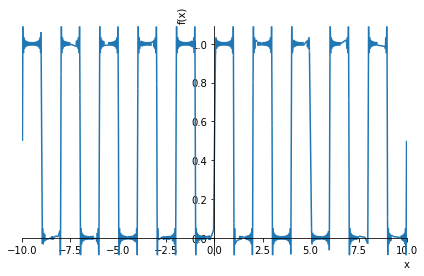

In [39]:
sp.plot(Fourier)

In [46]:
sp.fourier_series(p,(-1,1)).truncate(4)

In [47]:
sp.fourier_series(q,(-1,1)).truncate(4)

Now we combine the Fourier series we calculated with the general solution, creating a function to allow us to change the values of the constants and the number of terms. Since the Fourier series of $q$ has a constant of $0.5$, it will not have the correct boundary condition, so we will use `numpy` and a list comprehension to create the function. 

In [54]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def solution(x,t,alpha,terms):
    return sum([4*np.sin((2*n-1)*np.pi*x)/((2*n-1)*np.pi)*np.exp(-t*(alpha*n*np.pi)**2) for n in range(1, terms+1)])

def graph(t=0.01, alpha = 0.2, terms = 20):
    plt.figure(figsize= (10,8))
    x = np.arange(-1,1,0.001)
    y = solution(x,t,alpha,terms)
    y1 = np.ones_like(x)
    plt.plot(x, y, x, y1,'orange')
    plt.fill_between(x,0,y, alpha = 0.2)
    plt.ylim(-1.5,1.5)
    plt.xlabel("Distance")
    plt.ylabel("Concentration")
    plt.show()
    
    



In [55]:
interact(graph,t=(0.001,2,0.01), terms=(1,40,1));

interactive(children=(FloatSlider(value=0.01, description='t', max=2.0, min=0.001, step=0.01), FloatSlider(val…